REF: https://goldcopd.org/wp-content/uploads/2020/03/GOLD-2020-POCKET-GUIDE-ver1.0_FINAL-WMV.pdf
Need to get PFT date difference

exposure and lung function decline

PCA and cluster
- only exposure
    - SO2 TO PM25
    - PCA and K-means -> weights
- All 

Correlation:
- PM PCs and exposure vs all PFT changes
- Highlight significant correlated PFT values and T0 and T1

Scatterplot for FEV1, FEV1/FVC, and highly correlated with PM exposure

FEV1/FVC post < 0.7
FEV1/FVC post >=0.7 Gold0
Grade classification 

Find out decreased PFT variables and highlight
compute 1 year change of all PFT variables

Random Forest
- all %pred post 




Correlation between 
- all averaged PM variables and changes in PFT
- changes in PFT and baseline PFT

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.cluster import KMeans
from utility_v1 import K_means, PCA_2,swap_col,show_cor_heatmap

sns.set_theme(style="whitegrid")

Add Gold Grade to df_raw

In [2]:
root_path = '/Users/inkyu/Desktop/KU/Research/Data/PM'
data_path = '/Users/inkyu/Desktop/KU/Research/Data/PM/raw_data/ENV18PM_PMSN12_T1_201029WC.xlsx'
df_raw = pd.read_excel(data_path,header=1)
df = df_raw
subj_id = df.Subj.unique()
print('# of subjects: ' + str(len(subj_id)))
Gold0_i = df_raw.loc[(df_raw.loc[:,'FEV1/FVC Post Measured']>=70),'FEV1/FVC Post Measured'].index
Gold1_i = df_raw.loc[(df_raw.loc[:,'FEV1 %Pred Post']>=80),'FEV1 %Pred Post'].index
Gold2_i = df_raw.loc[(50<=df_raw.loc[:,'FEV1 %Pred Post']) &
                     (df_raw.loc[:,'FEV1 %Pred Post']<80),'FEV1 %Pred Post'].index
Gold3_i = df_raw.loc[(30<=df_raw.loc[:,'FEV1 %Pred Post']) &
                     (df_raw.loc[:,'FEV1 %Pred Post']<50),'FEV1 %Pred Post'].index
Gold4_i = df_raw.loc[(df_raw.loc[:,'FEV1 %Pred Post']<30),'FEV1 %Pred Post'].index

df_raw.loc[Gold1_i,'Gold'] = str(1)
df_raw.loc[Gold2_i,'Gold'] = str(2)
df_raw.loc[Gold3_i,'Gold'] = str(3)
df_raw.loc[Gold4_i,'Gold'] = str(4)
df_raw.loc[Gold0_i,'Gold'] = str(0)
# df_raw.head()
# df_raw.to_excel(os.path.join(root_path,'ENV18PM_PMSN12_T1_20201029_Gold.xlsx'))

# of subjects: 45


Calculate PFT annual change between fu1 and fu0 and save in PFT_changes

In [3]:
fu0_all = df[df.FU=='PFT0']
fu1 = df[df.FU=='PFT1']
temp = fu1.Subj.unique()
fu1_ID = pd.DataFrame({'Subj':temp})
fu0 = fu1_ID.merge(fu0_all, on='Subj')
PFT_variables = df.columns.values[13:62]
# Annual changes
fu0_PFT = fu0.loc[:,PFT_variables]
fu1_PFT = fu1.loc[:,PFT_variables]
PFT_changes = fu1_PFT.values - fu0_PFT.values
PFT_changes = pd.DataFrame(PFT_changes, columns=PFT_variables)
PFT_changes['Subj'] = fu1.Subj.values
PFT_changes = swap_col(PFT_changes)
# PFT_changes.head()

## PCA & K-means for PM variables

Calculate means of PM expsure

In [4]:
PM_variables = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']
fu01 = pd.merge(fu0,fu1, how='outer')
fu01['PM10'] = fu01['PM10'] - fu01['PM25']

### Use both fu0 & fu1 data

Plot PM2.5 vs PM10

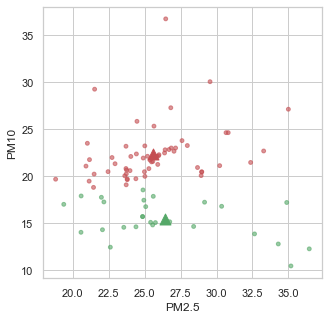

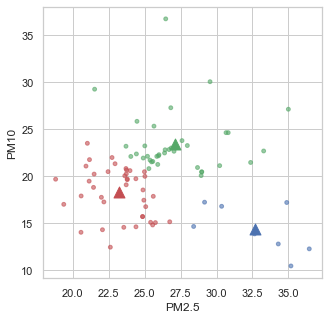

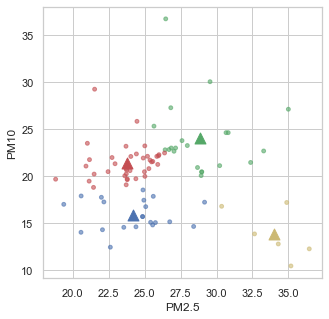

In [5]:
labels2_PM_fu01, centroids2_PM_fu01 = K_means(fu01.loc[:,'PM25'].values, fu01.loc[:,'PM10'].values, 
                                         n=2,plot=True,xlabel='PM2.5',ylabel='PM10')
labels3_PM_fu01, centroids3_PM_fu01 = K_means(fu01.loc[:,'PM25'].values, fu01.loc[:,'PM10'].values,
                                    n=3,plot=True,xlabel='PM2.5',ylabel='PM10')
labels4_PM_fu01, centroids4_PM_fu01 = K_means(fu01.loc[:,'PM25'].values, fu01.loc[:,'PM10'].values,
                                    n=4,plot=True,xlabel='PM2.5',ylabel='PM10')

PCA fu01

In [6]:
x_fu01 = fu01.loc[:,PM_variables].values
PCs, weights = PCA_2(x_fu01)
PC1_fu01 = PCs.iloc[:,0].values
PC2_fu01 = PCs.iloc[:,1].values
PC_weights_fu01 = pd.DataFrame(weights, columns=PM_variables,index=['PC1','PC2'])
PC_weights_fu01

,SO2,CO,O3,NO2,PM10,PM25
PC1,-0.432212,-0.283957,0.540436,-0.551120,-0.366079,0.052379
PC2,0.552534,-0.719729,-0.044177,-0.061489,-0.007576,0.413409


Plot PC1 vs PC2

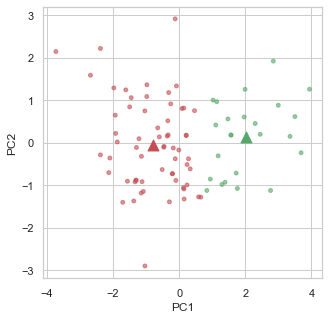

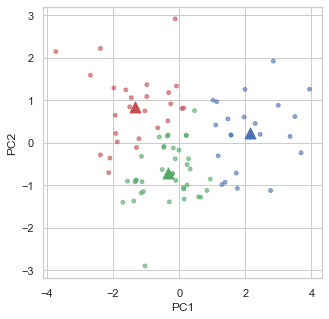

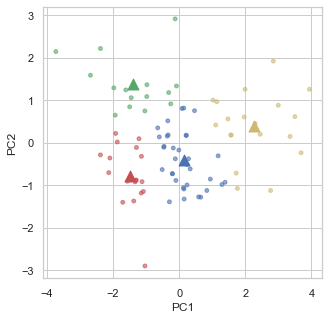

In [7]:
labels2_PC_fu01, centroids2_PC_fu01 = K_means(PC1_fu01, PC2_fu01, n=2,plot=True,xlabel='PC1',ylabel='PC2')
labels3_PC_fu01, centroids3_PC_fu01 = K_means(PC1_fu01, PC2_fu01, n=3,plot=True,xlabel='PC1',ylabel='PC2')
labels4_PC_fu01, centroids4_PC_fu01 = K_means(PC1_fu01, PC2_fu01, n=4,plot=True,xlabel='PC1',ylabel='PC2')

### Use average of fu0 & fu1

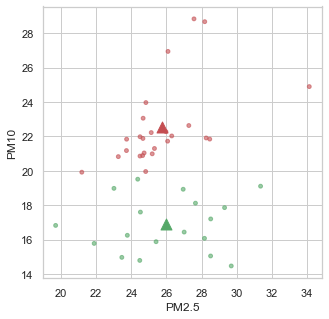

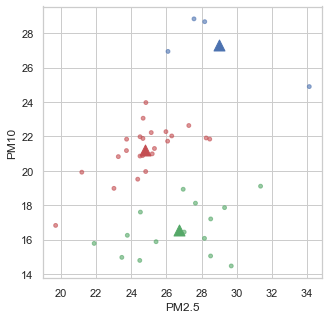

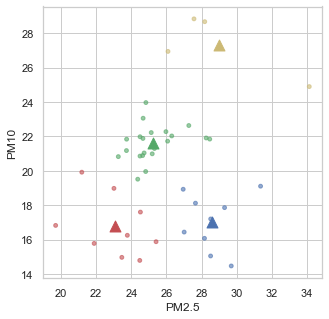

In [8]:
fu_mean = fu01.groupby(by='Subj',as_index=False).mean()

labels2_PM_fu_mean, centroids2_PM_fu_mean = K_means(fu_mean.loc[:,'PM25'].values, fu_mean.loc[:,'PM10'].values,
                                    n=2,plot=True,xlabel='PM2.5',ylabel='PM10')

labels3_PM_fu_mean, centroids3_PM_fu_mean = K_means(fu_mean.loc[:,'PM25'].values, fu_mean.loc[:,'PM10'].values,
                                    n=3,plot=True,xlabel='PM2.5',ylabel='PM10')

labels4_PM_fu_mean, centroids4PM_fu_mean = K_means(fu_mean.loc[:,'PM25'].values, fu_mean.loc[:,'PM10'].values,
                                    n=4,plot=True,xlabel='PM2.5',ylabel='PM10')


In [9]:
x_fu_mean = fu_mean.loc[:,PM_variables].values
PCs, weights = PCA_2(x_fu_mean)
PC1_fu_mean = PCs.iloc[:,0].values
PC2_fu_mean = PCs.iloc[:,1].values
PC_weights_fu_mean = pd.DataFrame(weights, columns=PM_variables,index=['PC1','PC2'])
PC_weights_fu_mean

,SO2,CO,O3,NO2,PM10,PM25
PC1,-0.412375,-0.295622,0.540199,-0.554819,-0.375799,0.041120
PC2,-0.019615,0.257558,0.206592,-0.163337,0.446248,0.815342


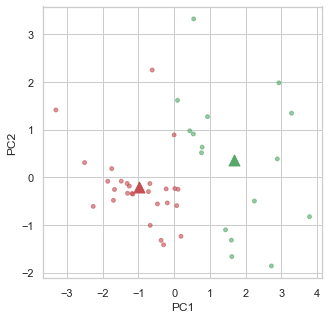

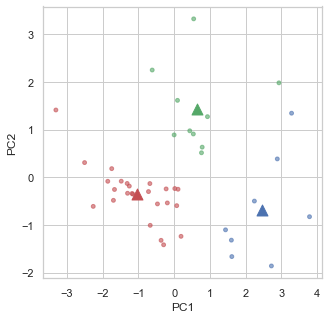

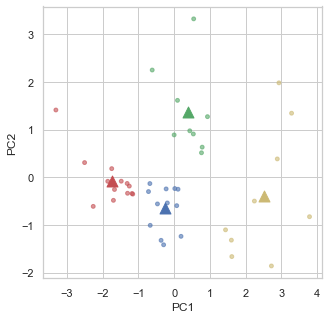

In [10]:
labels2_PC_fu_mean, centroids2_PC_fu_mean = K_means(PC1_fu_mean, PC2_fu_mean, n=2,plot=True,xlabel='PC1',ylabel='PC2')
labels3_PC_fu_mean, centroids3_PC_fu_mean = K_means(PC1_fu_mean, PC2_fu_mean, n=3,plot=True,xlabel='PC1',ylabel='PC2')
labels4_PC_fu_mean, centroids4_PC_fu_mean = K_means(PC1_fu_mean, PC2_fu_mean, n=4,plot=True,xlabel='PC1',ylabel='PC2')

# Correlation: PM PCs & Exposure variables vs PFT changes

In [11]:
fu01['PC1'] = PC1_fu01
fu01['PC2'] = PC2_fu01
fu01['Cluster_PM, k=2'] = labels2_PM_fu01
fu01['Cluster_PM, k=3'] = labels3_PM_fu01
fu01['Cluster_PM, k=4'] = labels4_PM_fu01
fu01['Cluster_PCA, k=2'] = labels2_PC_fu01
fu01['Cluster_PCA, k=3'] = labels3_PC_fu01
fu01['Cluster_PCA, k=4'] = labels4_PC_fu01

fu_mean['PC1'] = PC1_fu_mean
fu_mean['PC2'] = PC2_fu_mean
fu_mean['Cluster_PM, k=2'] = labels2_PM_fu_mean
fu_mean['Cluster_PM, k=3'] = labels3_PM_fu_mean
fu_mean['Cluster_PM, k=4'] = labels4_PM_fu_mean
fu_mean['Cluster_PCA, k=2'] = labels2_PC_fu_mean
fu_mean['Cluster_PCA, k=3'] = labels3_PC_fu_mean
fu_mean['Cluster_PCA, k=4'] = labels4_PC_fu_mean

fu_mean.head()

,Subj,PFT_date,Age,Height(cm),ID,Month_exposed,Year_exposed,FVC Pre Measured,FVC %Pred Pre,FVC Post Measured,...,CT Date,date,PC1,PC2,"Cluster_PM, k=2","Cluster_PM, k=3","Cluster_PM, k=4","Cluster_PCA, k=2","Cluster_PCA, k=3","Cluster_PCA, k=4"
0,PMSN12002,20175816.0,53.5,176.0,33133513.0,7.0,0.5,5.580,119.5,5.700,...,175778.0,20175778.0,1.612314,-1.665284,2,2,1,2,3,4
1,PMSN12003,20175878.0,63.5,170.0,44009742.0,6.5,0.5,3.100,76.0,3.340,...,176026.0,20176026.0,3.785915,-0.828244,2,2,1,2,3,4
2,PMSN12004,20175779.0,65.0,163.0,26604257.0,13.5,1.0,4.065,111.5,4.380,...,170769.5,20170769.5,-0.000837,0.889256,1,1,2,1,2,2
3,PMSN12005,20166163.0,67.5,171.5,18207523.0,5.5,0.5,4.675,115.0,4.625,...,166119.0,20166119.0,-2.505958,0.308132,1,3,4,1,1,1
4,PMSN12010,20185518.0,71.5,165.0,34623778.0,5.0,0.5,3.070,85.5,3.110,...,165507.5,20165507.5,0.763868,0.514147,2,2,3,2,2,2


In [12]:
# with pd.ExcelWriter(os.path.join(root_path,'ENV18PM_PMSN12_PM_20201102.xlsx')) as writer:
    
#     fu_mean.to_excel(writer,sheet_name='PM_Means',index=False)
#     PC_weights.to_excel(writer,sheet_name='PC weights')

In [13]:
fu_mean_ = fu_mean.loc[:,PM_variables]
fu_mean_['Subj'] = fu_mean['Subj']
fu_mean_ = swap_col(fu_mean_)
fu_mean_['PC1'] = fu_mean['PC1']
fu_mean_['PC2'] = fu_mean['PC2']

In [14]:
fu_mean_PFT_changes = fu_mean_.merge(PFT_changes, on='Subj', how='outer')
fu_mean_PFT_changes.head()

,Subj,SO2,CO,O3,NO2,PM10,PM25,PC1,PC2,FVC Pre Measured,...,DLCO Predicted,DLCO Pre Measured,DLCO %Pred Pre,DL Adj Pre Measured,DL Adj %Pred Pre,DLCO/VA Pre Measured,DLCO/VA %Pred Pre,DL/VA Adj Pre Measured,FEV1/FVC Pre Measured,FEV1/FVC Post Measured
0,PMSN12002,0.0035,0.4735,0.0295,0.0245,15.7860,21.8775,1.612314,-1.665284,0.08,...,0.1,-0.4,-2.0,-0.4,-2.0,-0.06,-2.0,-0.06,-1.0,0.0
1,PMSN12003,0.0040,0.3625,0.0340,0.0110,14.7980,24.4765,3.785915,-0.828244,0.48,...,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,-2.0
2,PMSN12004,0.0045,0.5200,0.0280,0.0265,22.6365,27.2720,-0.000837,0.889256,0.71,...,-0.3,-1.1,-6.0,-0.4,-2.0,-0.13,-2.0,0.02,1.0,0.0
3,PMSN12005,0.0065,0.4625,0.0220,0.0340,26.9425,26.0860,-2.505958,0.308132,-0.17,...,0.6,0.4,-1.0,0.1,-2.0,0.17,5.0,0.12,5.0,0.0
4,PMSN12010,0.0040,0.5525,0.0265,0.0195,18.9330,26.9520,0.763868,0.514147,0.02,...,-0.3,0.0,2.0,0.4,4.0,-0.13,-3.0,-0.02,-1.0,-3.0


### Average PM exposure vs PFT changes

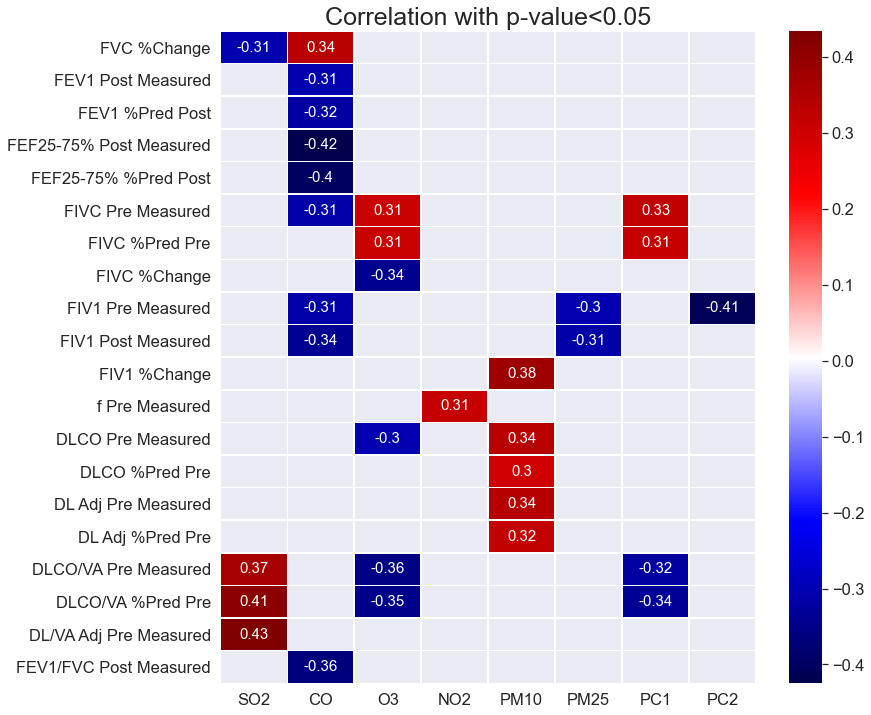

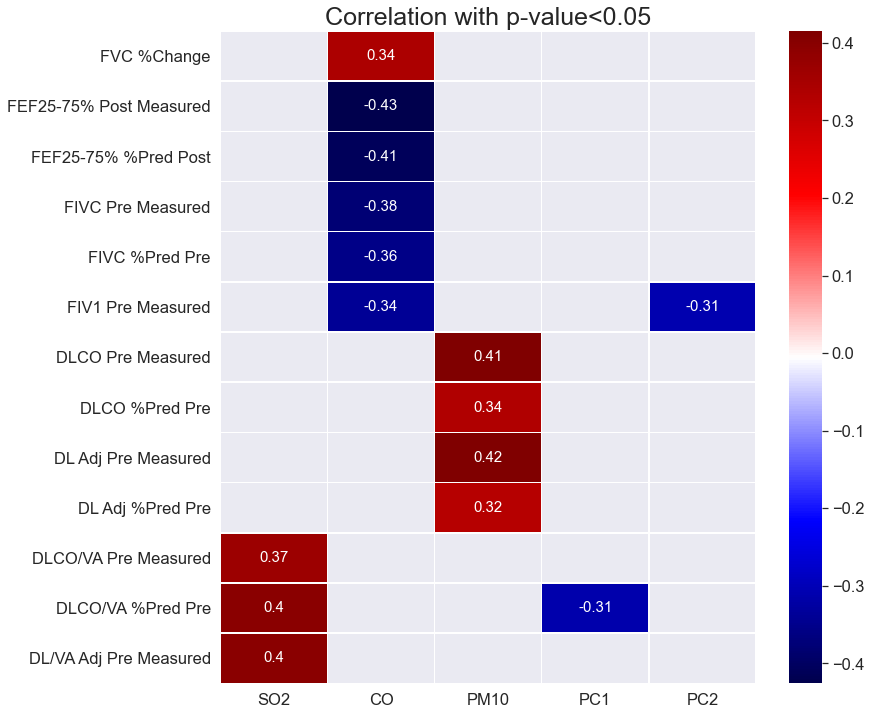

In [15]:
# Spearman
s_corr_mean = fu_mean_PFT_changes.corr(method='spearman')
PM_columns = s_corr_mean.columns[:8]
PFT_columns = s_corr_mean.columns[8:]
s_corr = show_cor_heatmap(s_corr_mean,43,PFT_columns,PM_columns)

# Pearson
p_corr_mean = fu_mean_PFT_changes.corr(method='pearson')
PM_columns = p_corr_mean.columns[:8]
PFT_columns = p_corr_mean.columns[8:]
p_corr = show_cor_heatmap(p_corr_mean,43,PFT_columns,PM_columns)

FU0 & FU1

In [246]:
fu0 = fu01[fu01.FU=='PFT0']
fu1 = fu01[fu01.FU=='PFT1']


In [247]:
fu0_PM = fu0.loc[:,PM_variables]
fu1_PM = fu1.loc[:,PM_variables]
fu0_PM['Subj'] = fu0['Subj']
fu0_PM = swap_col(fu0_PM)
fu0_PM['PC1'] = fu0['PC1']
fu0_PM['PC2'] = fu0['PC2']
fu1_PM['Subj'] = fu1['Subj']
fu1_PM = swap_col(fu1_PM)
fu1_PM['PC1'] = fu1['PC1']
fu1_PM['PC2'] = fu1['PC2']

fu0_PFT = fu0.loc[:,PFT_variables]
fu1_PFT = fu1.loc[:,PFT_variables]
fu0_PFT['Subj'] = fu0['Subj']
fu0_PFT = swap_col(fu0_PFT)
fu1_PFT['Subj'] = fu1['Subj']
fu1_PFT = swap_col(fu1_PFT)



### Baseline PM vs changes in PFT

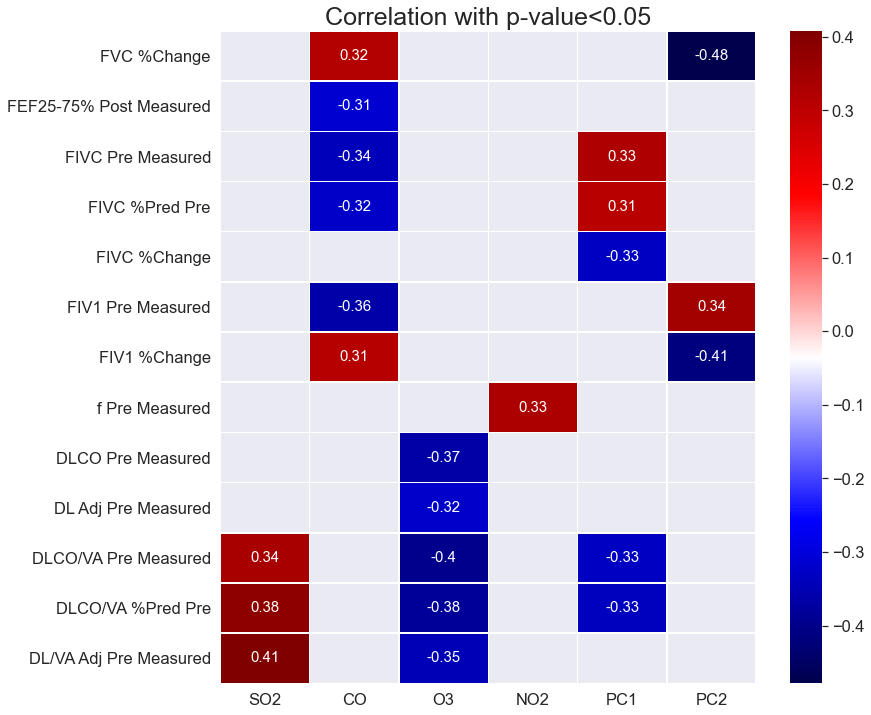

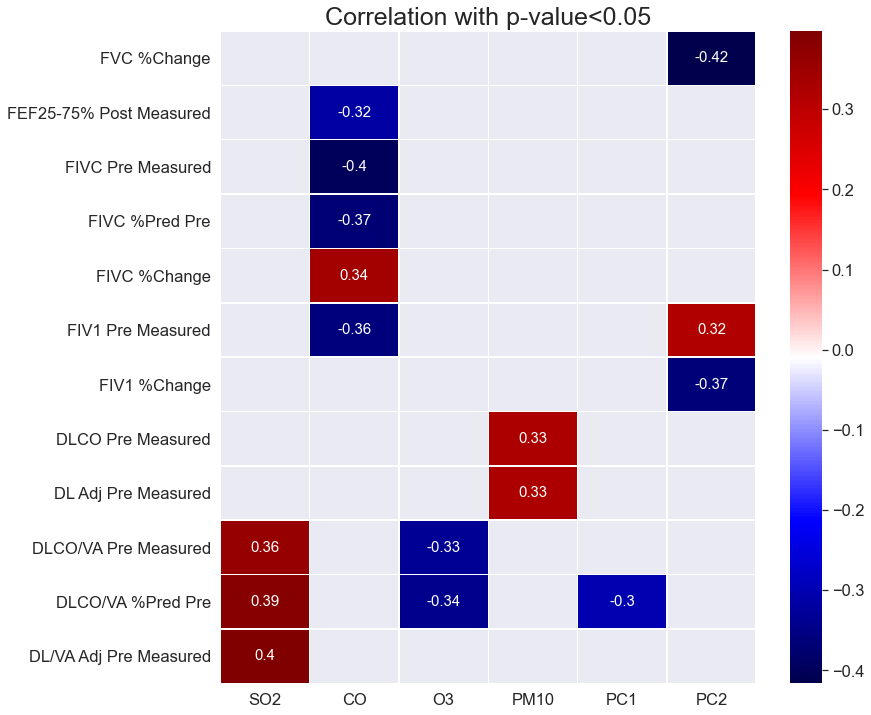

In [248]:
s_corr_0PM_dPFT = fu0_PM.merge(PFT_changes, on='Subj', how='outer').corr(method='spearman')
PM_columns = s_corr_0PM_dPFT.columns[:8]
PFT_columns = s_corr_0PM_dPFT.columns[8:]
s_corr = show_cor_heatmap(s_corr_0PM_dPFT,43,PFT_columns,PM_columns)

p_corr_0PM_dPFT = fu0_PM.merge(PFT_changes, on='Subj', how='outer').corr(method='pearson')
p_corr = show_cor_heatmap(p_corr_0PM_dPFT,43,PFT_columns,PM_columns)

### PM baseline vs PFT baseline

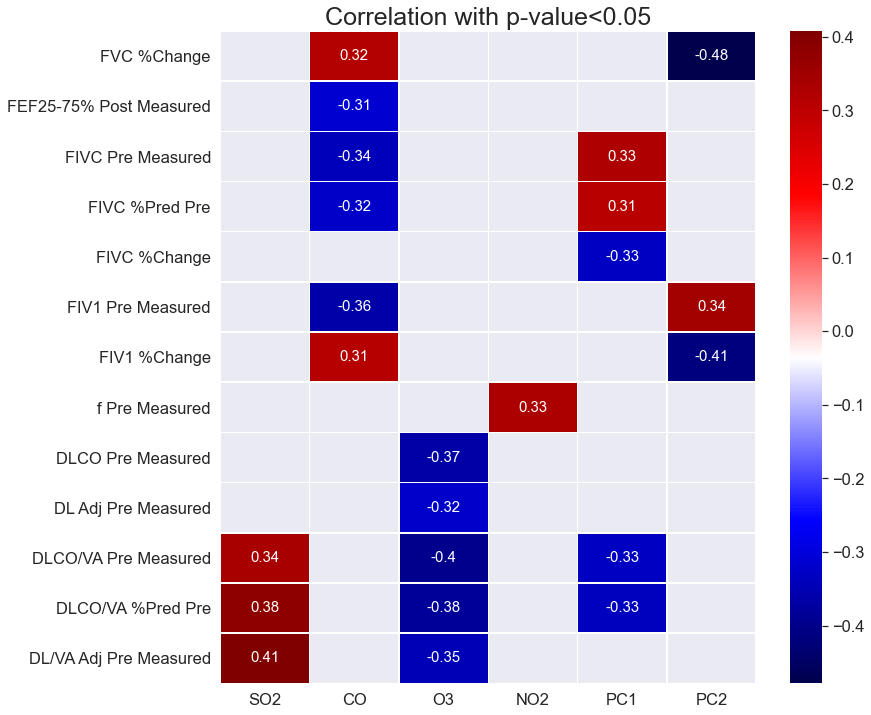

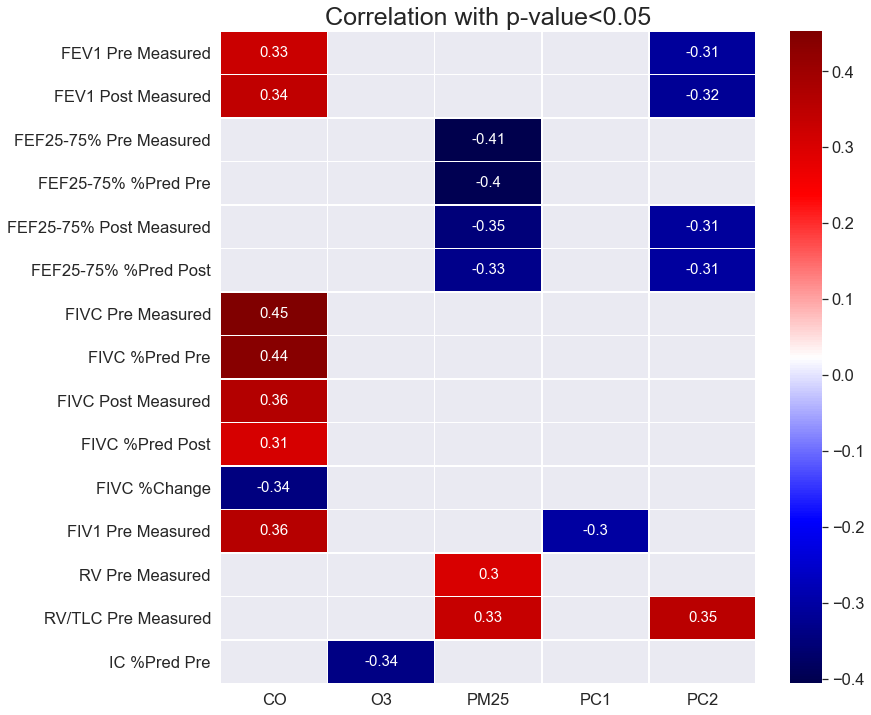

In [249]:
s_corr_0PM_0PFT = fu0_PM.merge(fu0_PFT, on='Subj', how='outer').corr(method='spearman')
PM_columns = s_corr_0PM_0PFT.columns[:8]
PFT_columns = s_corr_0PM_0PFT.columns[8:]
s_corr = show_cor_heatmap(s_corr_0PM_dPFT,43,PFT_columns,PM_columns)

p_corr_0PM_0PFT = fu0_PM.merge(fu0_PFT, on='Subj', how='outer').corr(method='pearson')
p_corr = show_cor_heatmap(p_corr_0PM_0PFT,43,PFT_columns,PM_columns)

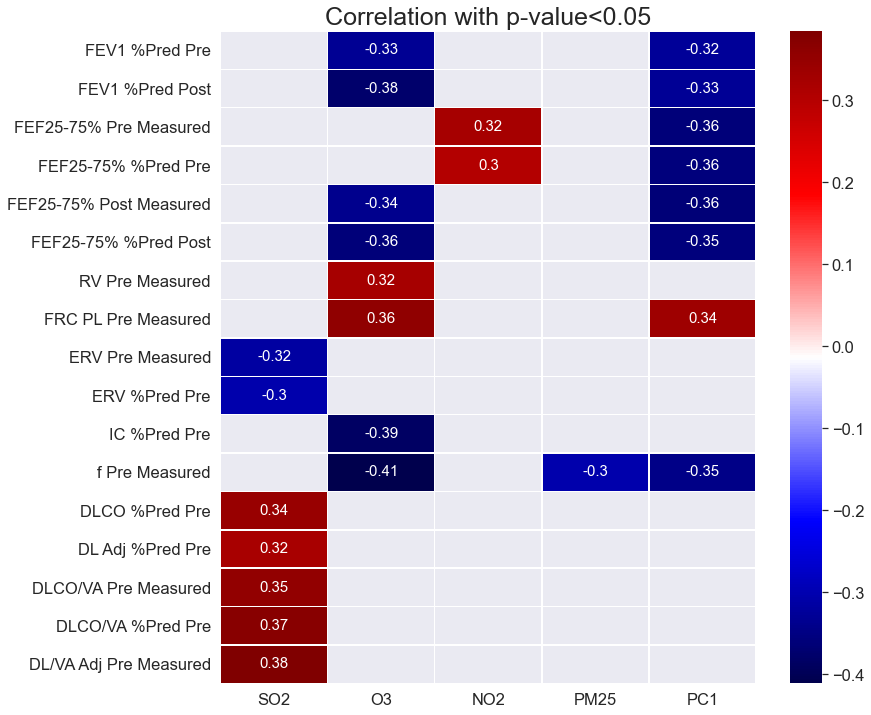

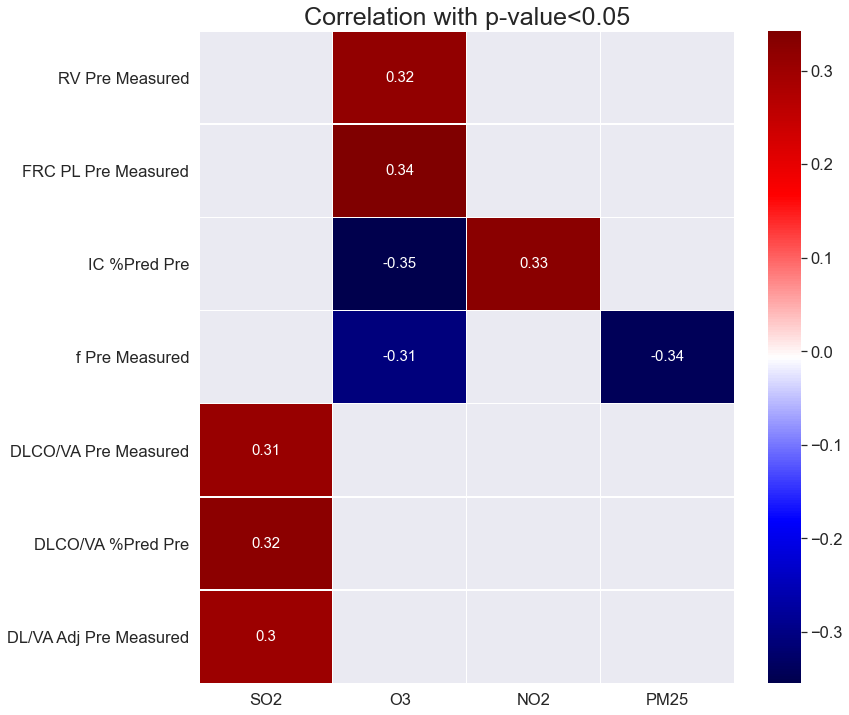

In [250]:
s_corr_1PM_1PFT = fu1_PM.merge(fu1_PFT, on='Subj', how='outer').corr(method='spearman')
PM_columns = s_corr_1PM_1PFT.columns[:8]
PFT_columns = s_corr_1PM_1PFT.columns[8:]
s_corr = show_cor_heatmap(s_corr_1PM_1PFT,43,PFT_columns,PM_columns)

p_corr_1PM_1PFT = fu1_PM.merge(fu1_PFT, on='Subj', how='outer').corr(method='pearson')
p_corr = show_cor_heatmap(p_corr_1PM_1PFT,43,PFT_columns,PM_columns)

In [23]:
# with pd.ExcelWriter(os.path.join(root_path,'ENV18PM_PMSN12_T1_Stats_20201029.xlsx')) as writer:
    
#     combined_df.to_excel(writer,sheet_name='PFT_changes_PM_mean',index=False)
#     PC_weights.to_excel(writer,sheet_name='PC weights')
#     s_corr.to_excel(writer, sheet_name='S_Correlation')
#     Ps_s.to_excel(writer, sheet_name='S_P-value')
    
#     p_corr.to_excel(writer, sheet_name='P_Correlation')
#     Ps_p.to_excel(writer, sheet_name='P_P-value')
    

# Scatterplot

In [24]:
fu0['Cluster'] = labels_4

In [25]:
temp = 12/np.transpose(np.tile(fu1.iloc[:,11].values, (49,1)))
fu1_annual_values = fu0.iloc[:,13:62].values + (fu1.iloc[:,13:62].values-fu0.iloc[:,13:62].values)*temp
fu1_annual = pd.DataFrame(data=fu1_annual_values,columns=PFT_variables)
fu1_annual['FU'] = fu1['FU'].values
fu1_annual = swap_col(fu1_annual)
fu1_annual['Subj'] = fu1['Subj'].values
fu1_annual = swap_col(fu1_annual)
fu1_annual['Cluster'] = labels_4
fu1_annual.head()

,Subj,FU,FVC Pre Measured,FVC %Pred Pre,FVC Post Measured,FVC %Pred Post,FVC %Change,FEV1 Pre Measured,FEV1 %Pred Pre,FEV1 Post Measured,...,DLCO Pre Measured,DLCO %Pred Pre,DL Adj Pre Measured,DL Adj %Pred Pre,DLCO/VA Pre Measured,DLCO/VA %Pred Pre,DL/VA Adj Pre Measured,FEV1/FVC Pre Measured,FEV1/FVC Post Measured,Cluster
0,PMSN12002,PFT1,5.608571,120.571429,5.750000,123.428571,2.857143,1.285714,38.000000,1.392857,...,12.257143,56.285714,12.257143,56.285714,1.948571,48.285714,1.948571,23.142857,24.000000,4
1,PMSN12003,PFT1,3.303077,81.076923,3.450000,85.461538,4.615385,0.813077,28.076923,0.938462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.461538,27.153846,4
2,PMSN12004,PFT1,4.025556,110.333333,4.346667,119.444444,8.222222,1.062222,41.444444,1.226667,...,6.411111,40.333333,6.622222,41.111111,1.432222,38.111111,1.468889,26.444444,28.000000,2
3,PMSN12005,PFT1,4.574545,113.818182,4.583636,114.090909,0.181818,1.971818,71.545455,1.929091,...,12.236364,68.909091,11.609091,65.818182,2.075455,56.454545,1.970909,43.454545,42.000000,1
4,PMSN12010,PFT1,3.084000,86.200000,3.082000,85.800000,-0.400000,1.374000,56.800000,1.470000,...,12.900000,77.400000,13.280000,78.800000,3.264000,91.400000,3.346000,44.800000,47.400000,2


In [26]:
fus = pd.concat([fu0,fu1_annual])
fus = fus.reset_index(drop=True)
fus['Gold'] = 0
for i in range(len(fus)):
    fus.loc[i,'Gold']=df_raw.loc[(fus.loc[i,'Subj'] == df_raw.Subj) & (fus.loc[i,'FU']==df_raw.FU),'Gold'].values
fus.Gold = (fus.Gold.values).astype(int)

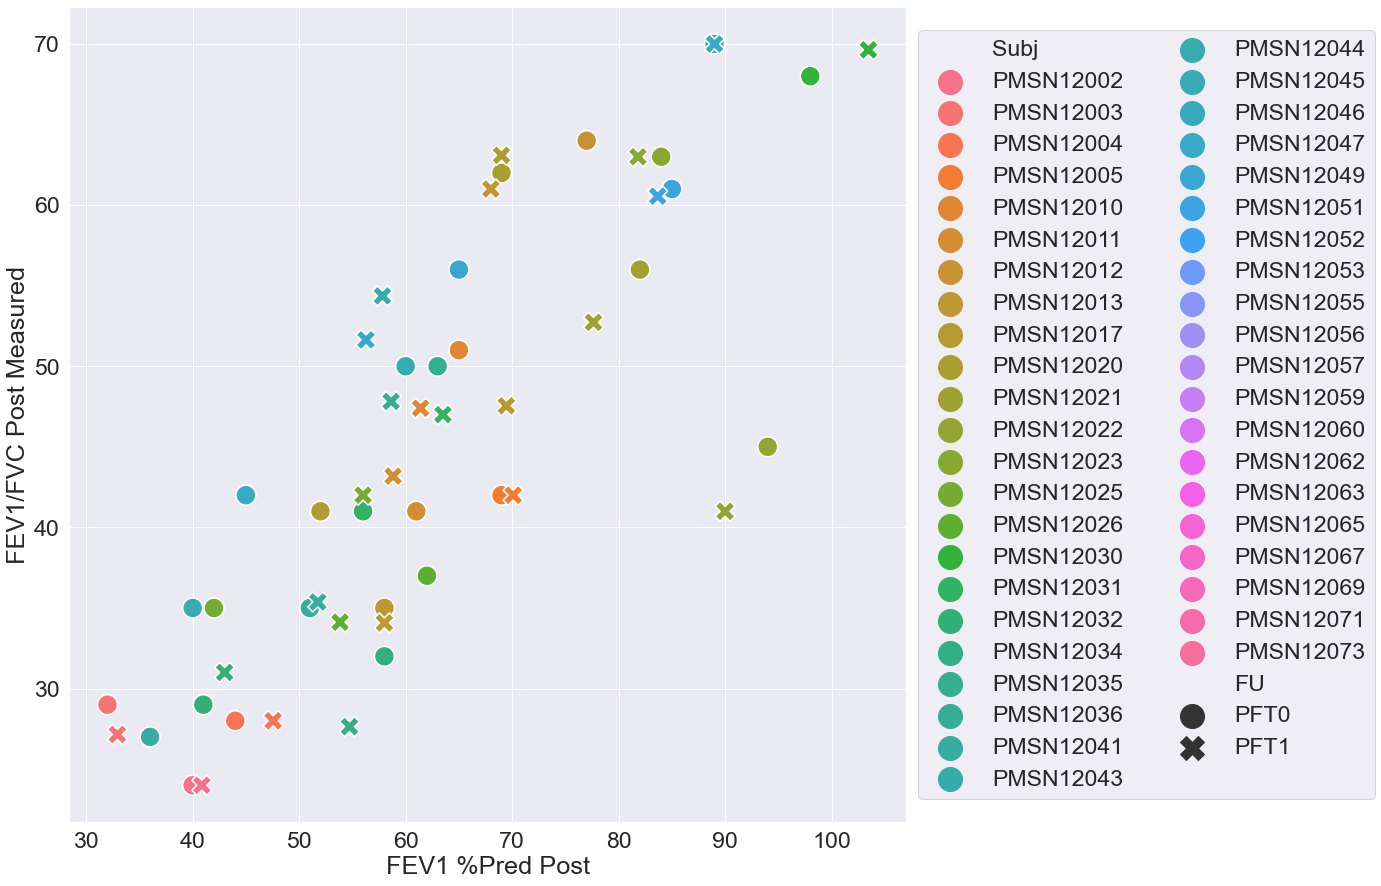

In [27]:
sns.set(font_scale=2.1)
f, ax = plt.subplots(figsize=(15, 15))

g = sns.scatterplot(x='FEV1 %Pred Post',y='FEV1/FVC Post Measured'
                    ,data=fus,hue='Subj',style='FU', s=400
                   )
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, markerscale=4)


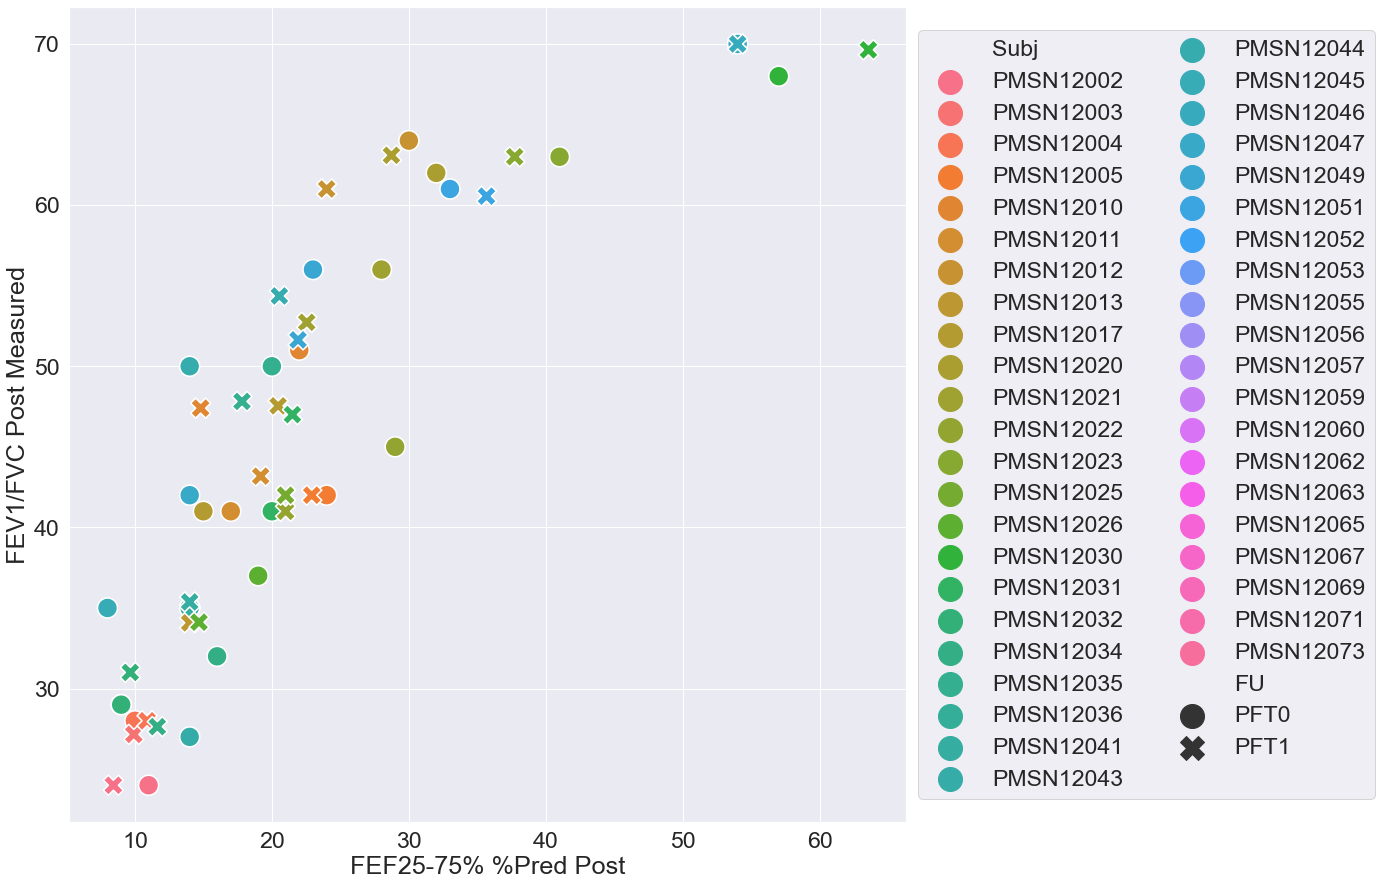

In [28]:
sns.set(font_scale=2.1)
f, ax = plt.subplots(figsize=(15, 15))
g = sns.scatterplot(x='FEF25-75% %Pred Post',y='FEV1/FVC Post Measured'
                    ,data=fus,hue='Subj',style='FU', s=400
                   )
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2,markerscale=4)


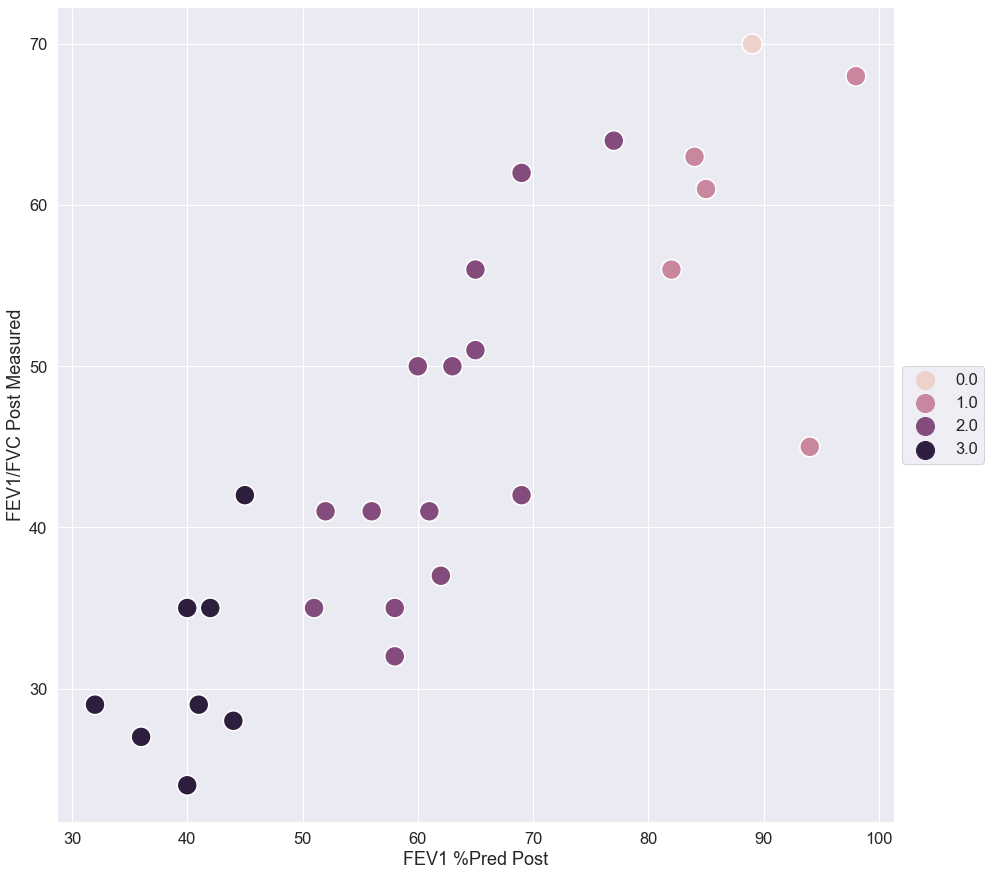

In [29]:
# sns.set(font_scale=1.5)
# f, ax = plt.subplots(figsize=(15, 15))

# g = sns.scatterplot(x='FEV1 %Pred Post',y='FEV1/FVC Post Measured'
#                     ,data=fus,hue='Gold',style='FU', s=400
#                    )
# g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,markerscale=3)
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 15))

g = sns.scatterplot(x='FEV1 %Pred Post',y='FEV1/FVC Post Measured'
                    ,data=fu0,hue='Gold', s=400
                   )
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,markerscale=3)



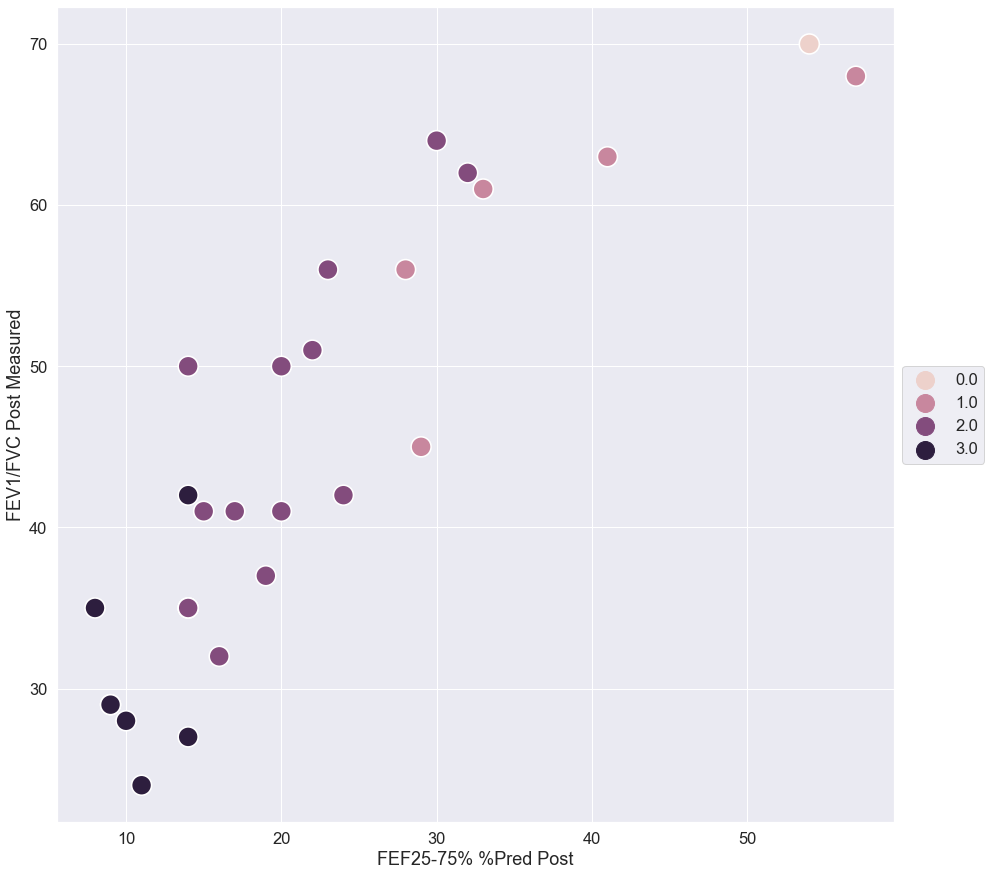

In [30]:
# sns.set(font_scale=1.5)
# f, ax = plt.subplots(figsize=(15, 15))
# g = sns.scatterplot(x='FEF25-75% %Pred Post',y='FEV1/FVC Post Measured'
#                     ,data=fus,hue='Gold',style='FU', s=400
#                    )
# g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,markerscale=3)
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 15))
g = sns.scatterplot(x='FEF25-75% %Pred Post',y='FEV1/FVC Post Measured'
                    ,data=fu0,hue='Gold', s=400
                   )
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,markerscale=3)


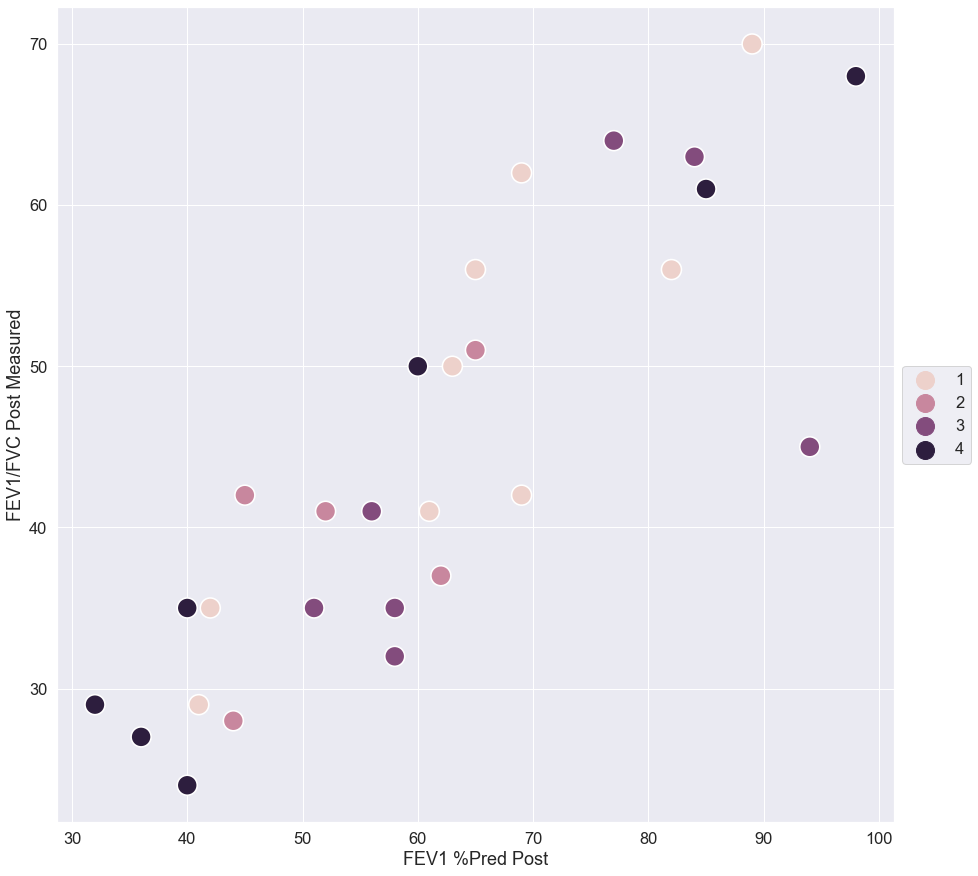

In [31]:
# sns.set(font_scale=1.5)
# f, ax = plt.subplots(figsize=(15, 15))

# g = sns.scatterplot(x='FEV1 %Pred Post',y='FEV1/FVC Post Measured'
#                     ,data=fus,hue='Cluster',style='FU', s=400
#                    )
# g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,markerscale=3)

sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 15))

g = sns.scatterplot(x='FEV1 %Pred Post',y='FEV1/FVC Post Measured'
                    ,data=fu0,hue='Cluster', s=400
                   )
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,markerscale=3)


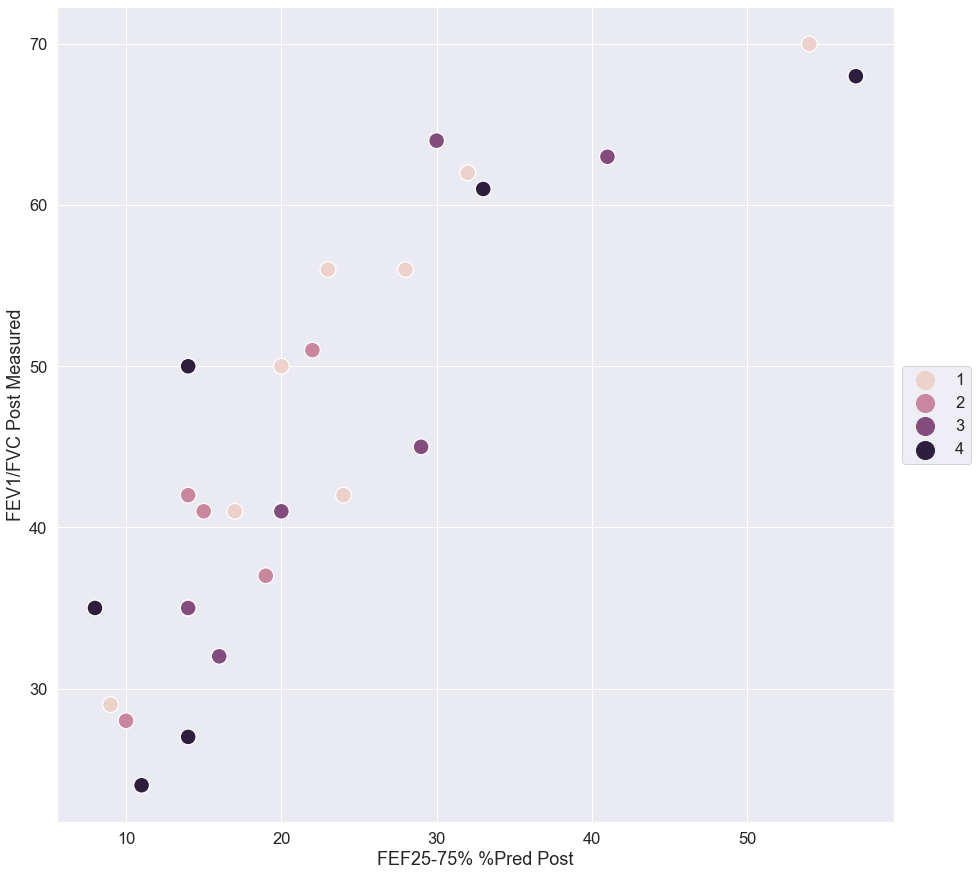

In [33]:
# sns.set(font_scale=1.5)
# f, ax = plt.subplots(figsize=(15, 15))
# g = sns.scatterplot(x='FEF25-75% %Pred Post',y='FEV1/FVC Post Measured'
#                     ,data=fus,hue='Cluster',style='FU', s=250
#                    )
# g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 15))
g = sns.scatterplot(x='FEF25-75% %Pred Post',y='FEV1/FVC Post Measured'
                    ,data=fu0,hue='Cluster', s=250
                   )
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,markerscale=3)


In [42]:
fu0_cluster_mean = fu0.groupby(['Cluster'],as_index=False).mean()
fu0_cluster_mean['FU'] = 'PFT0'
fu0_cluster_mean

,Cluster,PFT_date,Age,Height(cm),ID,Month_exposed,Year_exposed,FVC Pre Measured,FVC %Pred Pre,FVC Post Measured,...,SO2,CO,O3,NO2,PM10,PM25,CT Date,date,Gold,FU
0,1,2.016162e+07,67.307692,164.692308,3.225498e+07,0.0,0.0,3.478462,95.000000,3.506923,...,0.005462,0.556077,0.022077,0.033000,49.403154,25.932385,161607.307692,2.016161e+07,1.769231,PFT0
1,2,2.017185e+07,66.888889,168.000000,3.501856e+07,0.0,0.0,3.765556,98.000000,3.852222,...,0.004111,0.573111,0.026667,0.022889,52.716778,29.419111,168492.111111,2.016849e+07,2.111111,PFT0
2,3,2.016825e+07,71.250000,164.333333,3.696232e+07,0.0,0.0,3.349167,98.833333,3.451667,...,0.004833,0.488750,0.024417,0.029583,45.058583,26.884667,166592.083333,2.016659e+07,1.750000,PFT0
3,4,2.017501e+07,68.000000,167.555556,4.484880e+07,0.0,0.0,3.586667,93.777778,3.672222,...,0.003667,0.440889,0.030000,0.016000,44.282444,26.523444,172874.000000,2.017287e+07,2.333333,PFT0


In [43]:
fu1_cluster_mean = fu1_annual.groupby(['Cluster'],as_index=False).mean()
fu1_cluster_mean['FU'] = 'PFT1'
fu1_cluster_mean

,Cluster,FVC Pre Measured,FVC %Pred Pre,FVC Post Measured,FVC %Pred Post,FVC %Change,FEV1 Pre Measured,FEV1 %Pred Pre,FEV1 Post Measured,FEV1 %Pred Post,...,DLCO Pre Measured,DLCO %Pred Pre,DL Adj Pre Measured,DL Adj %Pred Pre,DLCO/VA Pre Measured,DLCO/VA %Pred Pre,DL/VA Adj Pre Measured,FEV1/FVC Pre Measured,FEV1/FVC Post Measured,FU
0,1,3.434232,94.146853,3.460845,94.736797,0.813387,1.655933,65.159307,1.723380,67.778222,...,14.609843,84.912021,14.526653,84.412055,3.249843,88.619847,3.236704,47.262626,49.272727,PFT1
1,2,3.806659,99.601582,3.895888,102.064017,2.372570,1.509065,58.306320,1.623334,62.794391,...,14.743230,81.051395,14.713494,80.850332,2.982160,81.146973,2.977531,37.862929,39.266364,PFT1
2,3,3.462227,102.812296,3.483784,102.578225,0.627040,1.488534,66.563161,1.584772,70.774457,...,13.435323,82.516090,13.580777,83.297908,3.242046,90.824522,3.284137,42.773976,44.155470,PFT1
3,4,3.560760,93.319481,3.576601,93.774678,0.366585,1.388748,52.976593,1.462958,55.987305,...,12.638209,74.934868,12.631480,74.986115,2.849010,78.286011,2.847582,46.118859,47.141880,PFT1


In [44]:
fus_mean = pd.concat([fu0_cluster_mean,fu1_cluster_mean])
fus_mean

,Cluster,PFT_date,Age,Height(cm),ID,Month_exposed,Year_exposed,FVC Pre Measured,FVC %Pred Pre,FVC Post Measured,...,SO2,CO,O3,NO2,PM10,PM25,CT Date,date,Gold,FU
0,1,2.016162e+07,67.307692,164.692308,3.225498e+07,0.0,0.0,3.478462,95.000000,3.506923,...,0.005462,0.556077,0.022077,0.033000,49.403154,25.932385,161607.307692,2.016161e+07,1.769231,PFT0
1,2,2.017185e+07,66.888889,168.000000,3.501856e+07,0.0,0.0,3.765556,98.000000,3.852222,...,0.004111,0.573111,0.026667,0.022889,52.716778,29.419111,168492.111111,2.016849e+07,2.111111,PFT0
2,3,2.016825e+07,71.250000,164.333333,3.696232e+07,0.0,0.0,3.349167,98.833333,3.451667,...,0.004833,0.488750,0.024417,0.029583,45.058583,26.884667,166592.083333,2.016659e+07,1.750000,PFT0
3,4,2.017501e+07,68.000000,167.555556,4.484880e+07,0.0,0.0,3.586667,93.777778,3.672222,...,0.003667,0.440889,0.030000,0.016000,44.282444,26.523444,172874.000000,2.017287e+07,2.333333,PFT0
0,1,NaN,NaN,NaN,NaN,NaN,NaN,3.434232,94.146853,3.460845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PFT1
1,2,NaN,NaN,NaN,NaN,NaN,NaN,3.806659,99.601582,3.895888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PFT1
2,3,NaN,NaN,NaN,NaN,NaN,NaN,3.462227,102.812296,3.483784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PFT1
3,4,NaN,NaN,NaN,NaN,NaN,NaN,3.560760,93.319481,3.576601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PFT1


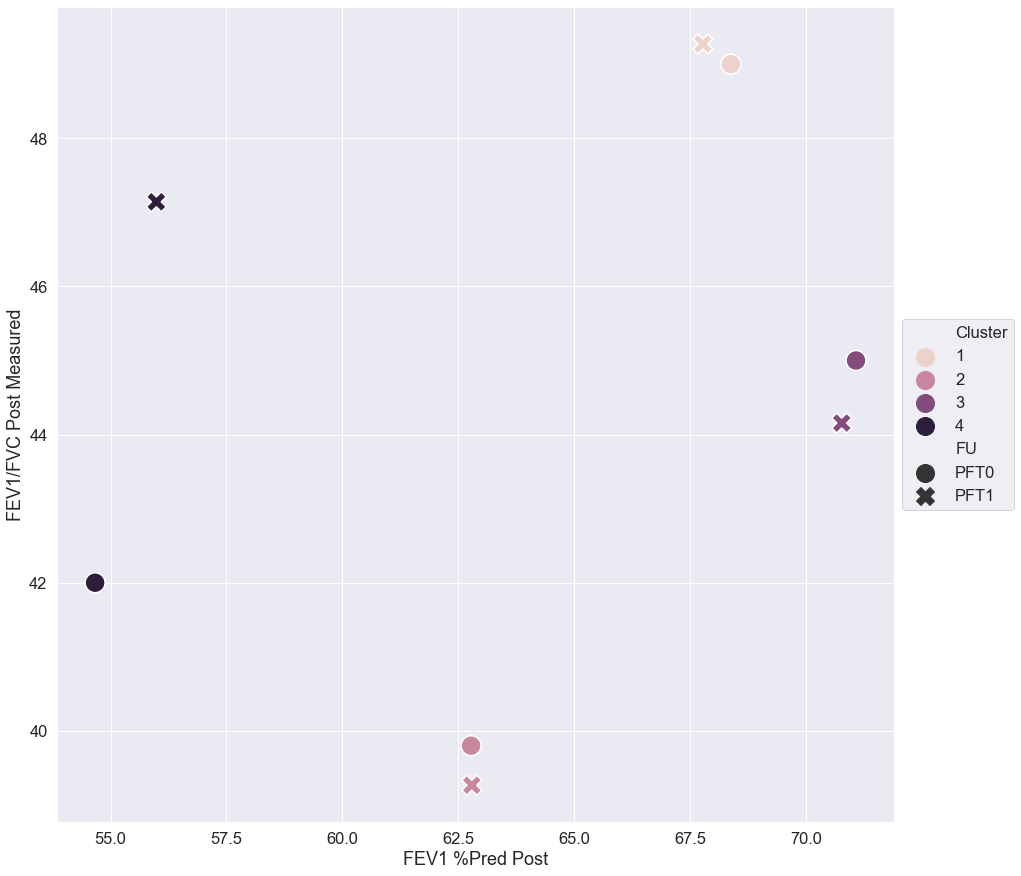

In [45]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 15))

g = sns.scatterplot(x='FEV1 %Pred Post',y='FEV1/FVC Post Measured'
                    ,data=fus_mean,hue='Cluster',style='FU', s=400
                   )
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,markerscale=3)


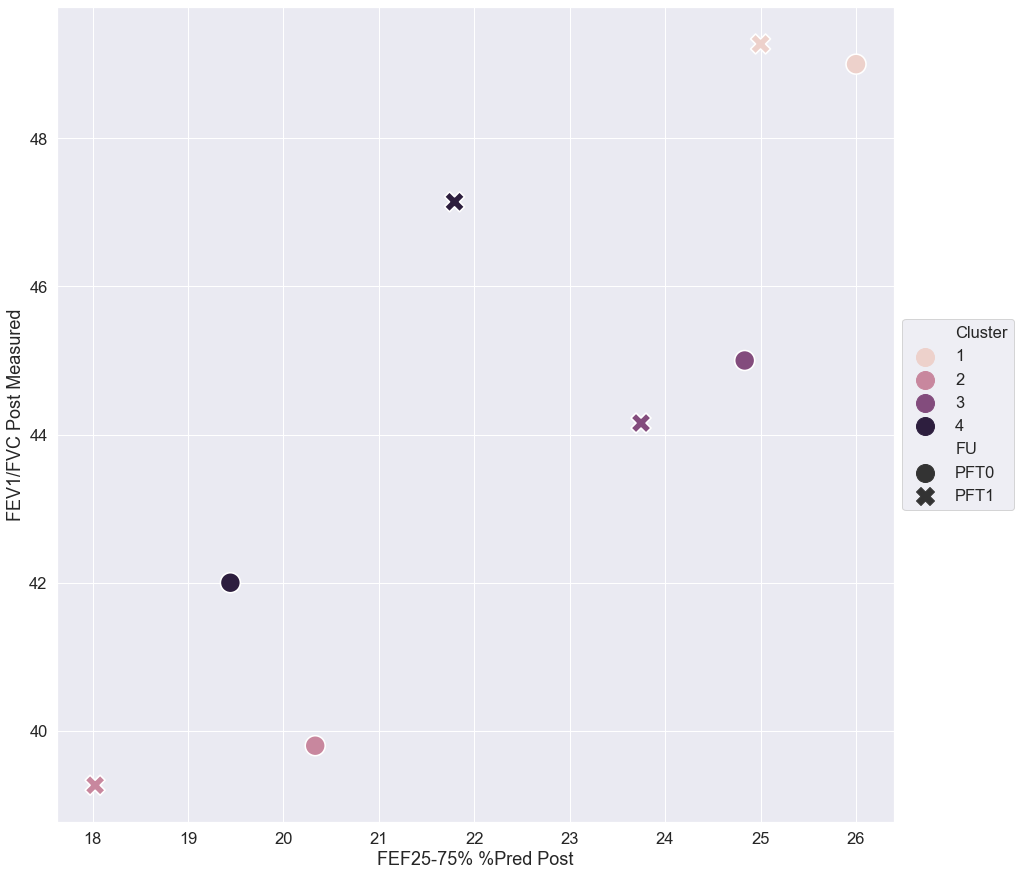

In [46]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 15))
g = sns.scatterplot(x='FEF25-75% %Pred Post',y='FEV1/FVC Post Measured'
                    ,data=fus_mean,hue='Cluster',style='FU', s=400
                   )
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,markerscale=3)


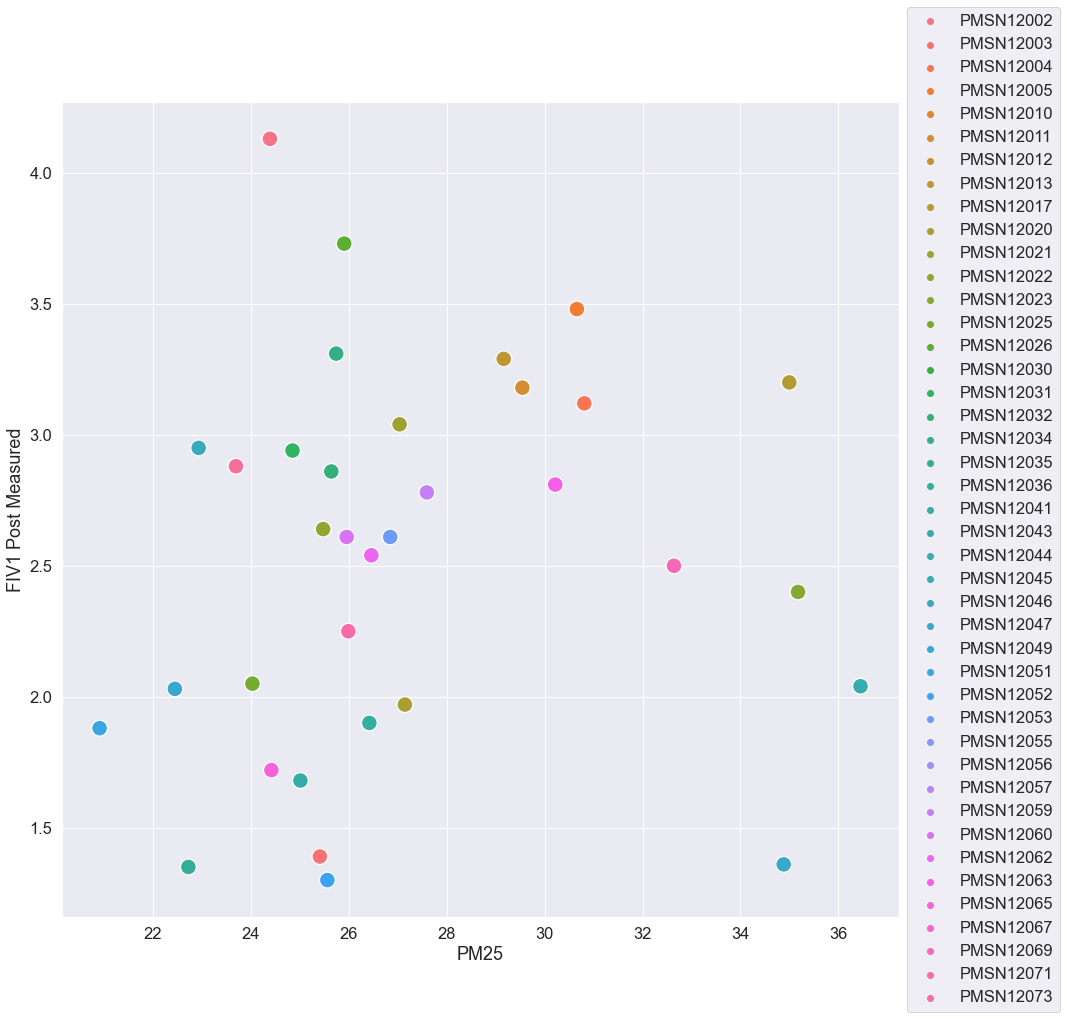

In [41]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 15))
g = sns.scatterplot(x='PM25',y='FIV1 Post Measured'
                    ,data=fu0,hue='Subj', s=250
                   )
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [43]:
temp_fu = pd.concat([fu0,fu1])

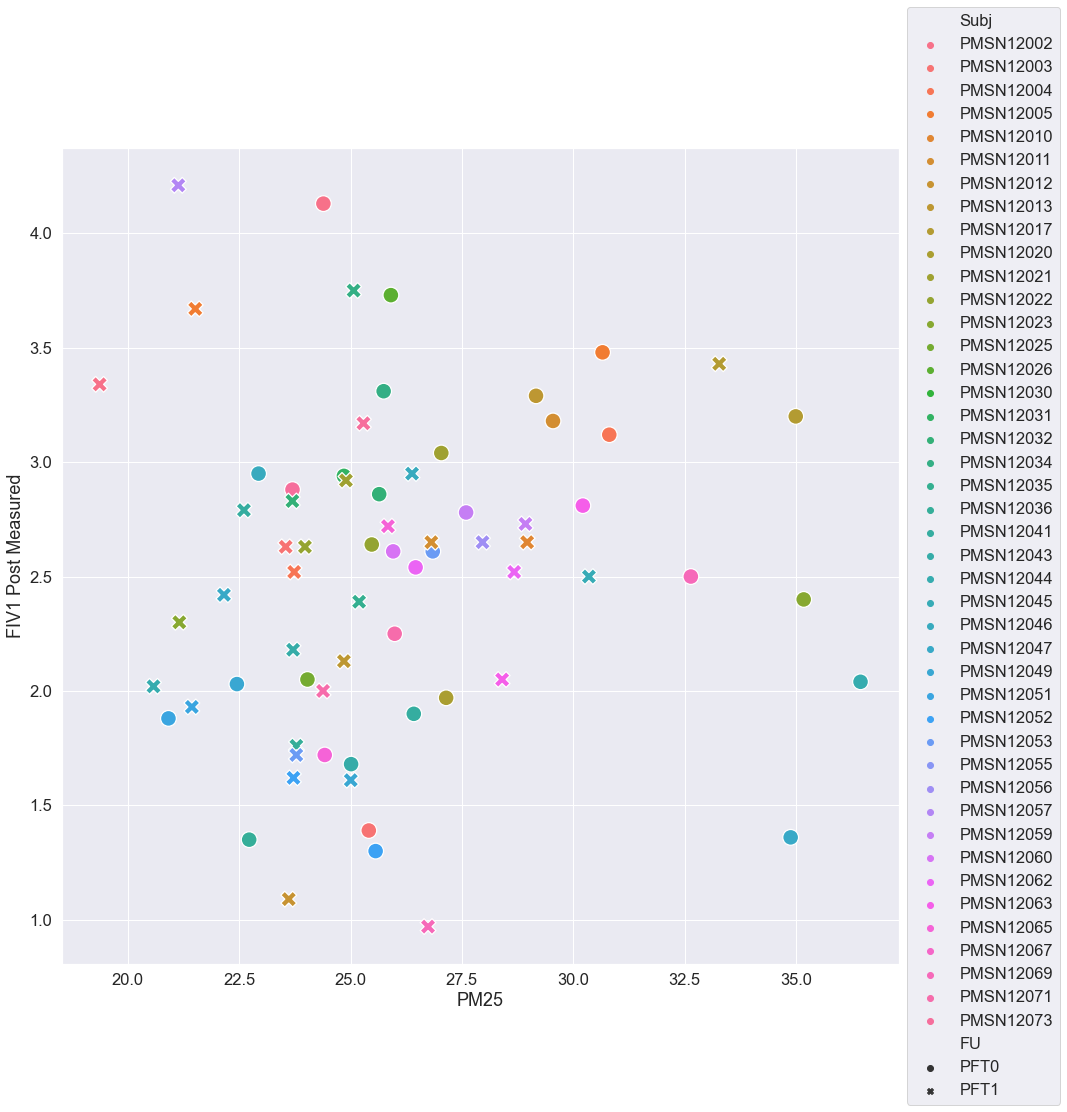

In [45]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 15))
g = sns.scatterplot(x='PM25',y='FIV1 Post Measured'
                    ,data=temp_fu,hue='Subj',style='FU', s=250
                   )

g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)